 Outliers 
feature selection in classification
standard scaling
hyper parameter tunning


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data=pd.read_csv("Social_Network_Ads.csv")

data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,127,57000,0
4,15804002,Male,19,76000,0


(array([190., 177.,  30.,   0.,   0.,   0.,   1.,   1.,   0.,   1.]),
 array([ 18. ,  36.1,  54.2,  72.3,  90.4, 108.5, 126.6, 144.7, 162.8,
        180.9, 199. ]),
 <BarContainer object of 10 artists>)

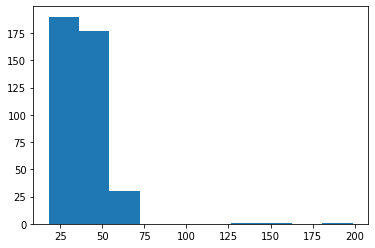

In [18]:
plt.hist(data['Age'])

#### Outlier

C:\Users\HP\Anaconda3\envs\cricket\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Age'>

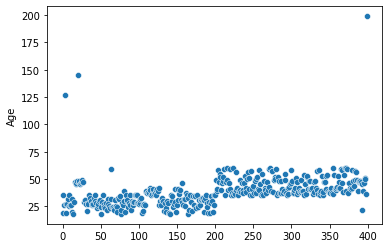

In [3]:
#plt.scatter(data.index,data['Age'])
sns.scatterplot(data.index,data['Age'])

C:\Users\HP\Anaconda3\envs\cricket\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

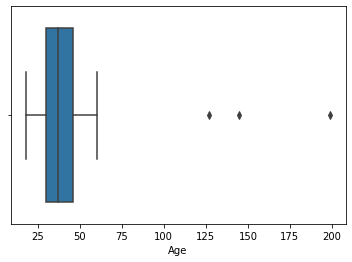

In [4]:
sns.boxplot(data['Age'])

In [5]:
data['Age'].describe()

count    400.0000
mean      38.4350
std       14.9007
min       18.0000
25%       29.7500
50%       37.0000
75%       46.0000
max      199.0000
Name: Age, dtype: float64

#### IQR

In [28]:
q1,q3=np.percentile(data['Age'],[25,75])
print(q1,q3)

29.75 46.0


In [29]:
iqr= q3 - q1

In [30]:
lb= q1 - (1.5 * iqr)
ub= q3 + (1.5 * iqr)
print(lb,ub)

5.375 70.375


In [31]:
data.shape

(400, 5)

In [32]:
data=data.loc[data['Age']>lb][data['Age']<ub]

#### z-score method

(array([29., 37., 45., 35., 77., 65., 34., 30., 18., 27.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <BarContainer object of 10 artists>)

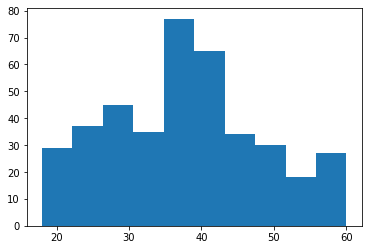

In [16]:
plt.hist(data['Age'])

In [ ]:
z = x - mean / SD

In [23]:
out=[] # getting all the outliers
def outliers(data):
    threshold=3 # indicates 3 SD
    mean= np.mean(data) # calculating mean
    std= np.std(data) # calculating SD
    
    for i in data: # looping to all age points
        z_score = (i - mean)/ std # z_score
        if np.abs(z_score)>threshold: # checking whether it is falling in 3 SD
            out.append(i) # adding the outliers
    return out

In [24]:
out=outliers(data['Age'])

In [25]:
out

[127, 145, 199]

In [33]:
data.shape

(397, 5)

In [34]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0


In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

In [36]:
x=data.iloc[:,[1,2,3]]
y=data.iloc[:,[4]]

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(317, 3)
(317, 1)
(80, 3)
(80, 1)


#### feature selection in classification

In [39]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_reg
mi=mutual_info_classif(x_train,y_train)
mi

C:\Users\HP\Anaconda3\envs\cricket\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0.04647396, 0.27589524, 0.23271719])

In [40]:
MI=pd.Series(mi)
MI.index=x_train.columns
MI.sort_values(ascending=False)

Age                0.275895
EstimatedSalary    0.232717
Gender             0.046474
dtype: float64

C:\Users\HP\Anaconda3\envs\cricket\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchased', ylabel='Age'>

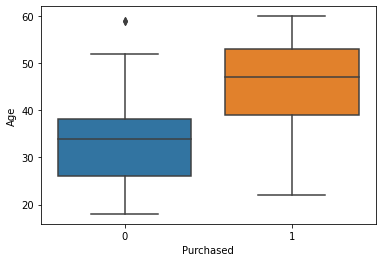

In [41]:
sns.boxplot(data['Purchased'],data['Age'])

C:\Users\HP\Anaconda3\envs\cricket\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='EstimatedSalary'>

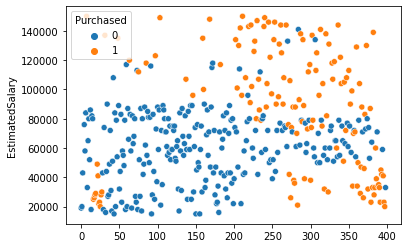

In [42]:
sns.scatterplot(data.index,data['EstimatedSalary'],hue=data['Purchased'])

C:\Users\HP\Anaconda3\envs\cricket\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchased', ylabel='count'>

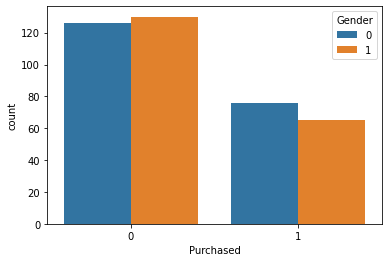

In [43]:
sns.countplot(data['Purchased'],hue=data['Gender'])

#### Groupby

In [44]:
data[['Gender','Purchased']].groupby('Gender').mean()

,Purchased
Gender,
0,0.376238
1,0.333333


#### Feature scaling

In [46]:
x_train.head()

,Gender,Age,EstimatedSalary
66,1,24,19000
57,1,28,79000
318,1,45,32000
104,0,19,21000
263,0,35,72000


In [49]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
ss=StandardScaler()
mms=MinMaxScaler()
x_train=mms.fit_transform(x_train)
x_test=mms.fit_transform(x_test)
x_train

array([[1.        , 0.14285714, 0.02962963],
       [1.        , 0.23809524, 0.47407407],
       [1.        , 0.64285714, 0.12592593],
       [0.        , 0.02380952, 0.04444444],
       [0.        , 0.4047619 , 0.42222222],
       [1.        , 0.57142857, 0.37037037],
       [0.        , 0.5       , 0.42962963],
       [0.        , 0.88095238, 0.81481481],
       [0.        , 0.5       , 0.88148148],
       [0.        , 0.95238095, 0.05925926],
       [1.        , 0.0952381 , 0.02222222],
       [0.        , 0.4047619 , 0.37037037],
       [1.        , 0.57142857, 0.42962963],
       [0.        , 0.21428571, 0.6       ],
       [1.        , 0.42857143, 0.76296296],
       [0.        , 0.9047619 , 0.65925926],
       [1.        , 0.97619048, 0.85185185],
       [1.        , 0.26190476, 0.34074074],
       [0.        , 0.4047619 , 0.60740741],
       [1.        , 0.14285714, 0.31851852],
       [0.        , 0.80952381, 0.55555556],
       [0.        , 0.92857143, 0.79259259],
       [0.

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [60]:
y_pred=dtc.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.9

In [61]:
confusion_matrix(y_pred,y_test)

array([[54,  3],
       [ 5, 18]], dtype=int64)

#### Hyper parameter tunning

In [55]:
from sklearn.model_selection import GridSearchCV
grid_param={ 
    'criterion':['gini','entropy'],
    'max_depth' : [ 5,6,7] 
}
grid_search=GridSearchCV(estimator=dtc,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7]})

In [56]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [57]:
dtc_hyper=DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc_hyper.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [58]:
y_pred_hyper=dtc_hyper.predict(x_test)
accuracy_score(y_test,y_pred_hyper)

0.9

In [62]:
confusion_matrix(y_pred,y_test)

array([[54,  3],
       [ 5, 18]], dtype=int64)

In [63]:
confusion_matrix(y_pred_hyper,y_test)

array([[54,  3],
       [ 5, 18]], dtype=int64)